# Import packages and load in the data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np

def window_rms(a, window_size):
    a2 = np.power(a,2)
    window = np.ones(window_size)/float(window_size)
    return np.sqrt(np.convolve(a2, window, 'valid'))


In [15]:
import numpy as np

#specify, what file nr to read
subject = "ralf"

with open("./Processed_data/Cheek/{}".format(subject), 'rb') as file:
    result = np.load(file)
    result -= result.mean()
    print(result.shape)
    cheek_array = result
    
with open("./Processed_data/Brow/{}".format(subject), 'rb') as file:
    result = np.load(file)
    result -= result.mean()
    print(result.shape)
    brow_array = result
    
with open("./Processed_data/Decisions/{}".format(subject), 'rb') as file:
    meta = np.load(file)
    print(meta.shape)
    
    
#specify, what file nr to read
subject = "ralf_2"

with open("./Processed_data/Cheek/{}".format(subject), 'rb') as file:
    result = np.load(file)
    result -= result.mean()
    cheek_array = np.concatenate([cheek_array,result], axis=0)
    print(meta.shape)
    
with open("./Processed_data/Brow/{}".format(subject), 'rb') as file:
    result = np.load(file)
    result -= result.mean()
    brow_array =  np.concatenate([brow_array,result],axis=0)
    print(result.shape)
    
with open("./Processed_data/Decisions/{}".format(subject), 'rb') as file:
    meta =  np.concatenate([meta,np.load(file)],axis=1)
    print(meta.shape)

    
#specify, what file nr to read
subject = "egert"

with open("./Processed_data/Cheek/{}".format(subject), 'rb') as file:
    result = np.load(file)
    result -= result.mean()
    cheek_array = np.concatenate([cheek_array,result], axis=0)
    print(result.shape)

with open("./Processed_data/Brow/{}".format(subject), 'rb') as file:
    result = np.load(file)
    result -= result.mean()
    brow_array =  np.concatenate([brow_array,result],axis=0)
    print(result.shape)
    
with open("./Processed_data/Decisions/{}".format(subject), 'rb') as file:
    meta = np.concatenate([meta,np.load(file)],axis=1)
    print(meta.shape)

(48, 1001)
(48, 1001)
(2, 49)
(2, 49)
(60, 1001)
(2, 109)
(62, 1001)
(62, 1001)
(2, 171)


In [10]:
meta.shape

(2, 171)

In [11]:
cheek_array.shape

(170, 1001)

## RMS

IndexError: boolean index did not match indexed array along dimension 0; dimension is 170 but corresponding boolean dimension is 171

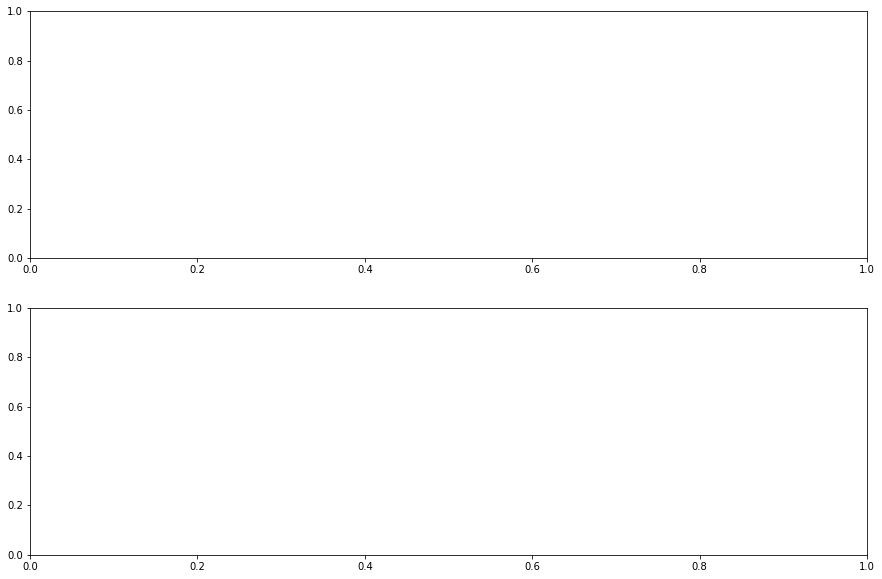

In [7]:
window_size = 5

cheek_array_rms = np.array([window_rms(ar,window_size) for ar in cheek_array])
cheek_array_rms.shape


brow_array_rms = np.array([window_rms(ar,window_size) for ar in brow_array])
cheek_array_rms.shape
fig, axes = plt.subplots(2,1, figsize=(15,10))


for ar in cheek_array_rms[meta[1],:]:
    axes[0].plot(ar)

for ar in cheek_array_rms[~meta[1],:]:
    axes[1].plot(ar)
fig.show()

fig, axes = plt.subplots(2,1, figsize=(15,10))
for ar in brow_array_rms[meta[1],:]:
    axes[0].plot(ar)

for ar in brow_array_rms[~meta[1],:]:
    axes[1].plot(ar)
fig.show()